In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
data_path_krat = 'Data/control_sim_0_krat_info.csv'
data_path_snake = 'Data/control_sim_0_snake_info.csv'
kratdata=pd.read_csv(data_path_krat,header=None)
kratdata.columns = ['krat_id', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','snakes_in_cell','owls_in_cell']
snakedata=pd.read_csv(data_path_snake,header=None)
snakedata.columns = ['snake_id', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','krats_in_cell','owls_in_cell']
#kratdata.sort_values(by=['owls_in_cell'], ascending=False).head(20)
#snakedata.head().sort_values(by=['owls_in_cell'], ascending=False)
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb
def round_down(x, a):
    return round(math.floor(x / a) * a,2)

In [3]:
data_path_krat.head()

AttributeError: 'str' object has no attribute 'head'

In [7]:
## Krat individual check
#kratdata.head()
# idoi = 2267458398536
ktemp = snakedata#[kratdata['bush_pw']==0]
#ktemp = ktemp[ktemp['cycle']==1]
ktemp.head(5)

,snake_id,cycle,open_pw,bush_pw,energy_score,movements,cell_id,microhabitat,krats_in_cell,owls_in_cell
0,139967433870736,0,0.0,1.0,0,0,"(2, 2)",OPEN,0,0
1,139967433871264,0,1.0,0.0,0,0,"(2, 10)",OPEN,0,0
2,139967433871120,0,1.0,0.0,0,0,"(2, 12)",OPEN,1,0
3,139967433870784,0,0.0,1.0,0,0,"(3, 1)",BUSH,0,0
4,139967433870976,0,1.0,0.0,0,0,"(3, 13)",BUSH,0,0


In [11]:
## snake individual check
# idoi = 2125413594440
# stemp = snakedata[snakedata['snake_id']==idoi]
stemp = snakedata#[kratdata['bush_pw']==0]
stemp = stemp[stemp['cycle']==1]
stemp.head(55)
#stemp.head(50)

,snake_id,cycle,open_pw,bush_pw,energy_score,movements,cell_id,microhabitat,krats_in_cell,owls_in_cell


Text(0.5, 1.0, 'Snake Count')

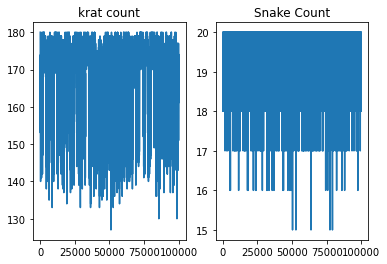

In [8]:
########## Population Counts ###############
df = kratdata[["cycle", "krat_id"]].groupby("cycle").krat_id.nunique()
df = df.reset_index()
df.columns = ['cycle','krats']
df2 = snakedata[["cycle", "snake_id"]].groupby("cycle").snake_id.nunique()
df2 = df2.reset_index()
df2.columns = ['cycle','snakes']


#Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axs[0]
ax.plot(df['cycle'], df['krats'])
ax.set_title('krat count')

ax = axs[1]
ax.plot(df2['cycle'], df2['snakes'])
ax.set_title('Snake Count')

krat 0.43, snake 0.56


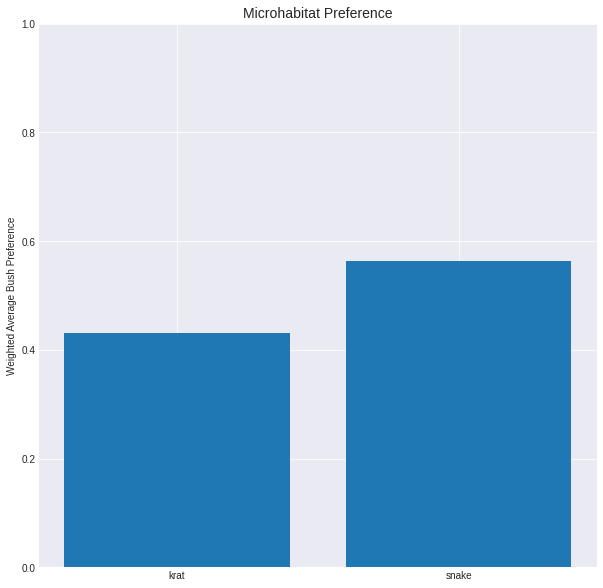

In [9]:
################# Total Sim Bar Chart ########################

df = kratdata[["cycle", "bush_pw","krat_id",]].groupby(["cycle","bush_pw"]).krat_id.nunique()
df = df.reset_index()
df.columns = ['cycle','bush_pw','krat_count']
df = df.pivot_table(
        values="krat_count", 
        index='cycle', 
        columns='bush_pw', 
        aggfunc=np.sum)

df = df.reset_index()
df.columns = ['cycle','open','bush']
#sum(df['open'])*0+
num = df['open'].sum()*0+df['bush'].sum()*1
denom = (df['open'].sum()+df['bush'].sum())
krat_avg = num / denom

df2 = snakedata[["cycle", "bush_pw","snake_id",]].groupby(["cycle","bush_pw"]).snake_id.nunique()
df2 = df2.reset_index()
df2.columns = ['cycle','bush_pw','snake_count']
df2 = df2.pivot_table(
        values="snake_count", 
        index='cycle', 
        columns='bush_pw', 
        aggfunc=np.sum)

df2 = df2.reset_index()
df2.columns = ['cycle','open','bush']
#sum(df['open'])*0+
num2 = df2['open'].sum()*0+df2['bush'].sum()*1
denom2 = (df2['open'].sum()+df2['bush'].sum())
snake_avg = num2 / denom2

print('krat {}, snake {}'.format(round(krat_avg,2),round(snake_avg,2)))
plt.style.use('seaborn-darkgrid')
data = [krat_avg,snake_avg]
figure_size = (10, 10)
plt.figure(figsize=figure_size)
plt.bar(['krat','snake'], data)
axes = plt.gca()
axes.set_ylim([0,1])
plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=14) #fontsize of the title
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
plt.rc('ytick', labelsize=20) #fontsize of the y tick labels
plt.ylabel("Weighted Average Bush Preference")
plt.title("Microhabitat Preference")
plt.show()

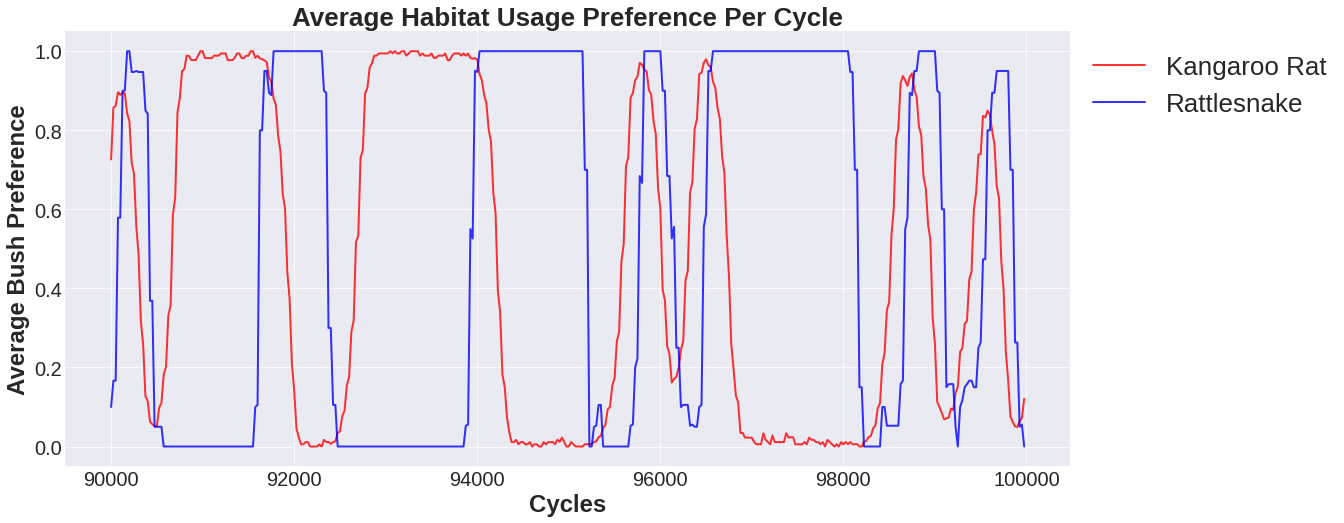

In [68]:
###### Normal Mean #############
df = kratdata[["cycle", "bush_pw"]].groupby("cycle").mean()
df = df.reset_index()
df = df[df['cycle']>=90000]
df.columns = ['cycle','bush_pw']
df2 = snakedata[["cycle", "bush_pw"]].groupby("cycle").mean()
df2 = df2.reset_index()
df2 = df2[df2['cycle']>=90000]
df2.columns = ['cycle','bush_pw']
#df2 = df2[df2['cycle']>=80000]


#Now switch to a more OO interface to exercise more features.
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24,
        'axes.titlesize' : 32,
        'axes.labelsize' : 14,
        'lines.linewidth' : 3,
        'lines.markersize' : 10,
        'xtick.labelsize' : 14,
        'ytick.labelsize' : 14}
fig = plt.figure(1)
ax = fig.add_subplot(111)
#ax.rcParams["figure.figsize"] = (18,8)
ax.plot(df['cycle'], df["bush_pw"],'red', linewidth=2.0, alpha=0.8, label = 'Kangaroo Rat')
ax.plot(df2['cycle'], df2["bush_pw"],'blue', linewidth=2.0, alpha=0.8, label = 'Rattlesnake')
ax.set_xlabel("Cycles", fontsize=24, weight = 'bold')
ax.set_ylabel("Average Bush Preference", fontsize=24, weight = 'bold')
ax.set_title("Average Habitat Usage Preference Per Cycle", fontsize=26, weight = 'bold')
lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=26)
#plt.rcParams.update({'font.size': 30})
fig.savefig('images/AHUPCycle.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
#ax.show()


In [40]:
###### harmonic Mean #############
df = kratdata[["cycle", "bush_pw"]].groupby("cycle")
df.head()
def harmonic_mean(df,cycle):
    
#df = df[df['cycle']>=80000]
# df.columns = ['cycle','bush_pw']
# df2 = snakedata[["cycle", "bush_pw"]].groupby("cycle").apply(stats.hmean)
# df2 = df2.reset_index()
# df2.columns = ['cycle','bush_pw']
# #df2 = df2[df2['cycle']>=80000]


# #Now switch to a more OO interface to exercise more features.
# plt.plot(df['cycle'], df["bush_pw"],'red', linewidth=.8, alpha=0.8, label = 'krat')
# plt.plot(df2['cycle'], df2["bush_pw"],'blue', linewidth=.8, alpha=0.8, label = 'snake')
# plt.xlabel("cycles")
# plt.ylabel("Average Bush Preference")
# plt.title("Average Habitat Usage by Genotype")
# plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')
# plt.show()

,cycle,bush_pw
0,0,1.0
1,0,0.0
2,0,1.0
3,0,1.0
4,0,0.0
...,...,...
31073,9950,1.0
31074,9950,1.0
31075,9950,1.0
31076,9950,1.0


In [36]:
ktemp = kratdata[kratdata['cycle']==max(kratdata['cycle'])]
stemp = snakedata[snakedata['cycle']==max(snakedata['cycle'])]
stemp.head()
# df = kratdata[["cycle", "bush_pw"]].groupby("cycle").mean()
# df = df.reset_index()
# df.columns = ['cycle','bush_pw']
# df2 = snakedata[["cycle", "bush_pw"]].groupby("cycle").mean()
# df2 = df2.reset_index()
# plt.contourf(X, Y, Z, cmap='Reds')
# plt.colorbar()

,snake_id,cycle,open_pw,bush_pw,energy_score,movements,cell_id,microhabitat,krats_in_cell,owls_in_cell
14274,2133274937416,49950,0.5,0.5,8314,6,"(0, 7)",OPEN,0,0
14275,2133275815496,49950,0.5,0.5,814,6,"(3, 2)",OPEN,0,0
14276,2133274996360,49950,0.5,0.5,6814,6,"(7, 0)",OPEN,2,0
14277,2133275964104,49950,0.5,0.5,5314,6,"(7, 7)",BUSH,0,0
14278,2133274872072,49950,0.5,0.5,17314,6,"(8, 7)",OPEN,3,0


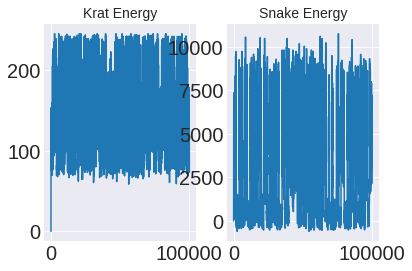

In [11]:
########## Population energy ###############
df = kratdata[["cycle","energy_score"]].groupby("cycle").mean()
df = df.reset_index()
df.columns = ['cycle','energy_score']
df2 = snakedata[["cycle", "energy_score"]].groupby("cycle").mean()
df2 = df2.reset_index()
df2.columns = ['cycle','energy_score']


#Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axs[1]
ax.plot(df2['cycle'], df2['energy_score'])
ax.set_title('Snake Energy')


ax = axs[0]
ax.plot(df['cycle'], df['energy_score'])
ax.set_title('Krat Energy')
plt.show()

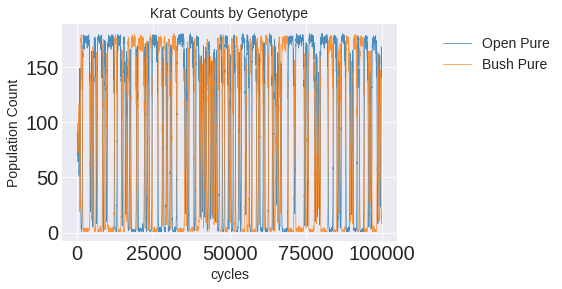

In [12]:
###########################
## Krat Counts By Genotype
##############################
kratdata["bush_pw_clean"] = round(kratdata["bush_pw"],1)
df = kratdata.groupby(["cycle", "bush_pw_clean"]).krat_id.nunique()
df = df.reset_index()
df.columns = ['cycle','bush_pw', "Pop Count"]
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns
#df = df.fillna(0)
col_name = []
color_dict = {}
color_change = 5

blue_counter = 1
red_counter = 1
rand_counter = 1
for i in df.columns:
    label = ''
    if i[1] == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i[1] == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[1])
        if i[1] < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,15,blue)
                red_counter += 1
        elif i[1] > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,15,blue)
                blue_counter += 1
        elif i[1] == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
# style
plt.style.use('seaborn-darkgrid')

plt.figure()
for i in cols:
    s = rgb_to_hex(color_dict[i])
    #plt.plot(df['cycle'], df[i],s.upper(), linewidth=.8, alpha=0.8, label = i)
    #plt.scatter(df['cycle'], df[i], alpha=0.8 , label = i)
    plt.plot(df['cycle'], df[i], linewidth=.8, alpha=0.8, label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("Krat Counts by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()

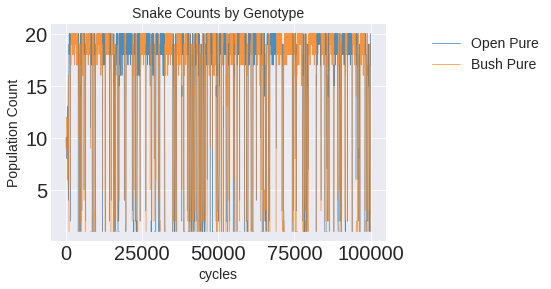

In [13]:
###########################
## Snake Counts By Genotype
##############################
df = snakedata.groupby(["cycle", "bush_pw"]).snake_id.nunique()
df = df.reset_index()
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns
#df = df[df['cycle']<=1000]
col_name = []
color_dict = {}
color_change = 35

blue_counter = 1
red_counter = 1
for i in df.columns:
    label = ''
    if i[1] == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i[1] == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[1])
        if i[1] < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,0,blue)
                red_counter += 1
        elif i[1] > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,0,blue)
                blue_counter += 1
        elif i[1] == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
plt.figure()
for i in cols:
    plt.plot(df['cycle'], df[i], linewidth=.8, alpha=0.8,  label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("Snake Counts by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()

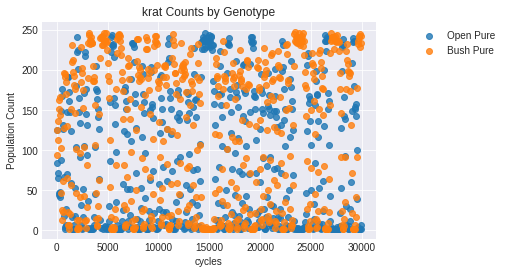

In [47]:
########################################
######## Krat Count Dot Plot ##########
########################################
df = kratdata.groupby(["cycle", "bush_pw"]).krat_id.nunique()
df = df.reset_index()
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns
col_name = []
color_dict = {}
color_change = 35

blue_counter = 1
red_counter = 1
for i in df.columns:
    label = ''
    if i[1] == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i[1] == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[1])
        if i[1] < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,0,blue)
                red_counter += 1
        elif i[1] > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,0,blue)
                blue_counter += 1
        elif i[1] == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
plt.figure()
for i in cols:
    plt.scatter(df['cycle'], df[i], alpha=0.8 , label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("krat Counts by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()

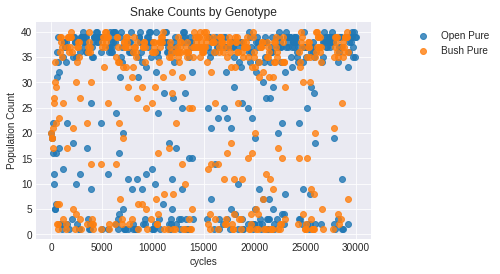

In [48]:
########################################
######## Snake Count Dot Plot ##########
########################################
df = snakedata.groupby(["cycle", "bush_pw"]).snake_id.nunique()
df = df.reset_index()
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns
col_name = []
color_dict = {}
color_change = 35

blue_counter = 1
red_counter = 1
for i in df.columns:
    label = ''
    if i[1] == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i[1] == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[1])
        if i[1] < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,0,blue)
                red_counter += 1
        elif i[1] > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,0,blue)
                blue_counter += 1
        elif i[1] == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
plt.figure()
for i in cols:
    plt.scatter(df['cycle'], df[i], alpha=0.8 , label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("Snake Counts by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()